In [3]:
!pip install tqdm

  Using cached tqdm-4.19.6-py2.py3-none-any.whl


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from IPython.display import display
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [5]:
from sklearn.metrics import accuracy_score, f1_score

In [6]:
cd ..

/home/jovyan/DS_02_Final


In [7]:
%run src/load_data_2.py

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=383)
Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=383)


In [8]:
whos DataFrame

Variable              Type         Data/Info
--------------------------------------------
df_gelman             DataFrame          LotFrontage   LotAr<...>[1451 rows x 383 columns]
df_housing_original   DataFrame          LotFrontage  LotAre<...>[1451 rows x 383 columns]
df_standard           DataFrame          LotFrontage   LotAr<...>[1451 rows x 383 columns]
housing_df            DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
listing_df            DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
sale_df               DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df             DataFrame            Id  MSSubClass MS<...>n[1460 rows x 15 columns]


In [9]:
np.random.seed(20)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [56]:
housing_train_df = df_gelman.drop('SalePrice', axis=1)
housing_target = df_gelman['SalePrice']

In [57]:
housing_train_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.043080,-0.065830,0.525494,0.441038,0.598461,0.390174,-0.17823,-0.168977,0.001975,-0.401354,...,-0.029391,-0.149397,-0.022751,0.194017,-0.136714,-0.026279,-0.043685,-0.05909,0.232439,-0.151439
2,0.282123,0.057485,0.084614,-0.209405,-0.405349,0.444600,-0.17823,0.001909,0.170817,0.210649,...,-0.029391,-0.149397,-0.022751,0.194017,-0.136714,-0.026279,-0.043685,-0.05909,0.232439,-0.151439
3,0.027507,0.210770,0.493040,0.417104,0.562464,0.327844,-0.17823,0.115667,0.033331,-0.287695,...,-0.029391,-0.149397,-0.022751,0.194017,-0.136714,-0.026279,-0.043685,-0.05909,0.232439,-0.151439
4,-0.168179,0.052438,-0.934033,-0.355154,-0.405349,0.192679,-0.17823,0.174333,-0.052045,-0.218961,...,-0.029391,-0.149397,-0.022751,0.194017,1.827370,-0.026279,-0.043685,-0.05909,-1.074807,-0.151439
5,0.358665,0.439912,0.476802,0.369201,0.708201,0.377655,-0.17823,0.148245,0.128493,0.057237,...,-0.029391,-0.149397,-0.022751,0.194017,-0.136714,-0.026279,-0.043685,-0.05909,0.232439,-0.151439


In [58]:
housing_target.head()

Id
1    0.281984
2    0.108413
3    0.368933
4   -0.216508
5    0.509170
Name: SalePrice, dtype: float64

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

# Train-Test-Split

In [100]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.33
    )

    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    
    score = regressor.score(X_test,y_test)
    return score

def mean_r2_for_feature(data, feature):
    scores = []
    for _ in range(10):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [104]:
from matplotlib import pyplot

# Top 10 Features

[  1.52912138e-02   6.98762427e-02   2.95910615e-02   1.95690417e-02
   5.87775619e-03   3.40806878e-02   1.51140229e-03   1.86813296e-02
   6.24056483e-02   1.60008263e-02   1.36298416e-02   1.46628662e-03
   1.04786518e-01   1.19948022e-02   2.94678134e-02   8.43397633e-03
   1.50936962e-02   2.51016559e-03   0.00000000e+00   1.24582806e-02
   7.02815244e-03   0.00000000e+00   5.39007194e-03   1.00972204e-04
   3.25250361e-03   0.00000000e+00   0.00000000e+00   1.60334253e-03
   1.30837214e-03   0.00000000e+00   1.10097543e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.32445866e-02   8.92247842e-03
   0.00000000e+00   2.87667534e-03   0.00000000e+00   1.79893040e-03
   0.00000000e+00   0.00000000e+00   2.03338348e-03   6.65399975e-05
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   6.22418584e-03   0.00000000e+00
   0.00000000e+00   0.00000000e+00

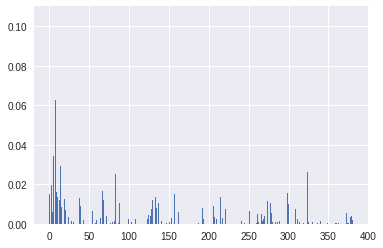

In [108]:
model = GradientBoostingRegressor()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


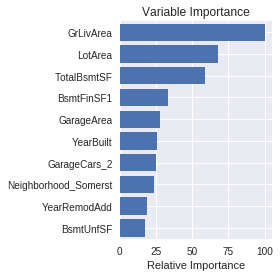

In [131]:
model = GradientBoostingRegressor()
model.fit(X, y)

feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_gelman[sorted_idx])
plt.ylim([372, 382])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [79]:
r2_results = {}
numeric_cols = housing_df.drop(['SalePrice'], axis=1).select_dtypes(exclude=['category']).columns
print("Calculate R2 Score for {} features".format(len(numeric_cols)))
for col in numeric_cols:
    r2 = mean_r2_for_feature(housing_train_df, col)
    print("{:24} {}".format(col, r2))
    r2_results[col] = r2

Calculate R2 Score for 23 features
LotFrontage              0.6056293272096489
LotArea                  0.735870644766812
YearBuilt                0.9216384484696036
YearRemodAdd             0.6494310419170581
MasVnrArea               0.9566754054669648
BsmtFinSF1               0.989192758460657
BsmtFinSF2               0.983299715548919
BsmtUnfSF                0.737194641008042
TotalBsmtSF              0.9825663462624569
FirstFlrSF               0.9467190790744825
SecondFlrSF              0.9776080716285878
LowQualFinSF             0.393809718864199
GrLivArea                0.988642165057015
GarageYrBlt              0.8287279547029074
GarageArea               0.9875197922799875
WoodDeckSF               0.20171943218762048
OpenPorchSF              0.29696570337249895
EnclosedPorch            0.19919127665797767
ThreeSsnPorch            -0.31283932289900807
ScreenPorch              -0.026756231209350546
PoolArea                 0.9991886172146209
MiscVal                  0.917302583456

In [82]:
corr = df_gelman.corr()
corr['SalePrice-Abs'] = abs(corr['SalePrice'])
corr.sort_values(by=['SalePrice-Abs'], ascending=False)['SalePrice-Abs'][0:20]

SalePrice           1.000000
GrLivArea           0.730620
FirstFlrSF          0.609835
ExterQual_TA        0.595146
YearBuilt           0.584085
FullBath_1          0.573606
YearRemodAdd        0.565244
KitchenQual_TA      0.537961
Foundation_PConc    0.529806
GarageCars_3        0.526388
ExterQual_Gd        0.511701
Fireplaces_0        0.511254
FireplaceQu_None    0.511254
FullBath_2          0.505694
GarageYrBlt         0.497614
BsmtQual_TA         0.477198
HeatingQC_Ex        0.466062
BsmtQual_Ex         0.462085
OpenPorchSF         0.459409
GarageArea          0.454535
Name: SalePrice-Abs, dtype: float64